In [1]:
import numpy as np, healpy as hp, pickle, curvedsky as cs, tqdm, sys
from matplotlib.pyplot import *
import local, tools_cmbalm
import binning, plottools as pl

/global/homes/t/toshiyan/Work/Lib/actlib/actsims/actsims/noise.py:9: UserWarning: No pyfftw found. Using much slower numpy fft engine.
  if 'fftw' not in pfft.engine: warnings.warn("No pyfftw found. Using much slower numpy fft engine.")


In [2]:
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/actsims/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/soapack/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/orphics/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/tilec/")
from pixell import enmap
from soapack import interfaces

In [7]:
qids_d = ['boss_d01','boss_d02','boss_d03','boss_d04','s16_d01','s16_d02','s16_d03']
qids_n = ['boss_01','boss_02','boss_03','boss_04']
qids = qids_d + qids_n
kwargs = {'snmin':1,'snmax':2}

In [8]:
aobj = {q: local.init_analysis_params(qid=q,**kwargs) for q in qids}

In [10]:
xl = {}
for qi, qid in enumerate(qids): 
    for pid in qids[qi+1:]: 
        print(qid,pid)
        xl[qid,pid] = np.zeros((len(aobj[qid].rlz),aobj[qid].lmax+1))
        for ii, rlz in enumerate(aobj[qid].rlz):
            if rlz==0: continue
            Talm0 = pickle.load(open(aobj[qid].falm['n']['T'][rlz],"rb"))
            Talm1 = pickle.load(open(aobj[pid].falm['n']['T'][rlz],"rb"))
            xl[qid,pid][ii,:] = cs.utils.alm2cl(aobj[qid].lmax,Talm0,Talm1)

boss_d01 boss_d02
boss_d01 boss_d03
boss_d01 boss_d04
boss_d01 s16_d01
boss_d01 s16_d02
boss_d01 s16_d03
boss_d01 boss_01
boss_d01 boss_02
boss_d01 boss_03
boss_d01 boss_04
boss_d02 boss_d03
boss_d02 boss_d04
boss_d02 s16_d01
boss_d02 s16_d02
boss_d02 s16_d03
boss_d02 boss_01
boss_d02 boss_02
boss_d02 boss_03
boss_d02 boss_04
boss_d03 boss_d04
boss_d03 s16_d01
boss_d03 s16_d02
boss_d03 s16_d03
boss_d03 boss_01
boss_d03 boss_02
boss_d03 boss_03
boss_d03 boss_04
boss_d04 s16_d01
boss_d04 s16_d02
boss_d04 s16_d03
boss_d04 boss_01
boss_d04 boss_02
boss_d04 boss_03
boss_d04 boss_04
s16_d01 s16_d02
s16_d01 s16_d03
s16_d01 boss_01
s16_d01 boss_02
s16_d01 boss_03
s16_d01 boss_04
s16_d02 s16_d03
s16_d02 boss_01
s16_d02 boss_02
s16_d02 boss_03
s16_d02 boss_04
s16_d03 boss_01
s16_d03 boss_02
s16_d03 boss_03
s16_d03 boss_04
boss_01 boss_02
boss_01 boss_03
boss_01 boss_04
boss_02 boss_03
boss_02 boss_04
boss_03 boss_04


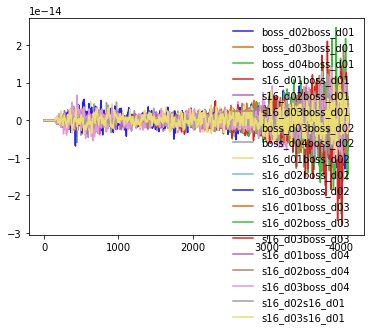

In [24]:
l = aobj['boss_d01'].l
s = l**4/np.pi
for qi, qid in enumerate(qids_d):
    for pid in qids_d[qi+1:]: 
        if qid=='boss_d03' and pid=='boss_d04': continue 
        if qid=='s16_d02' and pid=='s16_d03': continue 
        plot(l,s*np.average(xl[qid,pid],axis=0),label=pid+qid)
legend()

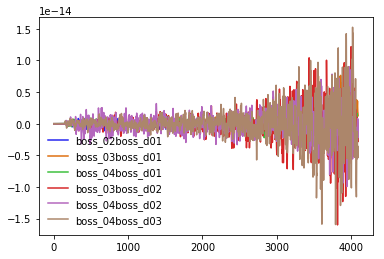

In [25]:
for qi, qid in enumerate(qids_d): 
    for pid in qids_n[qi+1:]: 
        plot(l,s*np.average(xl[qid,pid],axis=0),label=pid+qid)
legend()

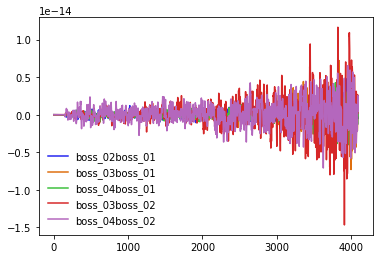

In [26]:
for qi, qid in enumerate(qids_n): 
    for pid in qids_n[qi+1:]: 
        if qid=='boss_03' and pid=='boss_04': continue 
        plot(l,s*np.average(xl[qid,pid],axis=0),label=pid+qid)
legend()